In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Define paths
dataset_path = 'CNN_dataset'

# Image size (resize all images to the same size)
img_size = (128, 128)

# Batch size for training
batch_size = 32

In [3]:
# Create an ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,  # Random shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True)  # Random horizontal flip

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Define directories for training and validation
train_dir = os.path.join(dataset_path)
validation_dir = os.path.join(dataset_path)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 50000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.


In [4]:
# Build the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

# Output Layer (5 categories)
model.add(Dense(5, activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
print(train_generator.class_indices)

{'AbdomenCT': 0, 'CXR': 1, 'ChestCT': 2, 'Hand': 3, 'HeadCT': 4}


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9175 - loss: 0.2270

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 934s 596ms/step - accuracy: 0.9175 - loss: 0.2269 - val_accuracy: 0.9892 - val_loss: 0.0336
Epoch 2/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 1.0000 - loss: 0.0265 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [7]:
# Evaluate the model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy*100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 280s 179ms/step - accuracy: 0.9956 - loss: 0.0157
Validation Accuracy: 99.44%


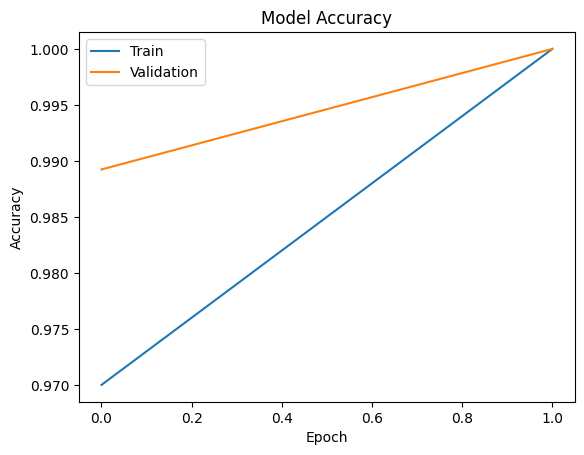

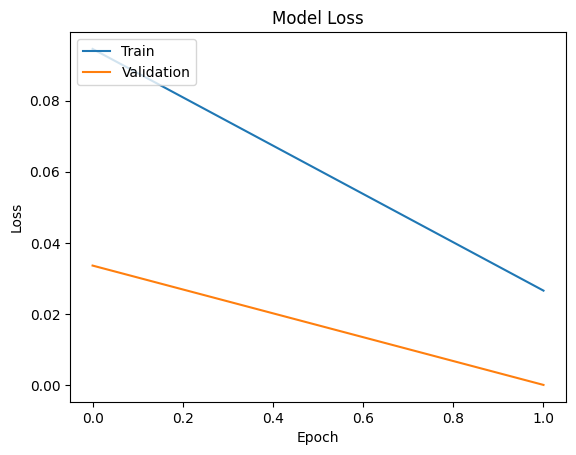

In [8]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
model.save('cnn_medical_image_classifier.h5')